# Predicting Life Expectancy Linear Regression

## Dataset
The dataset we will be using is about Life expectancy of different countries. We will explore how immunization factors, mortality factors, economic factors, social factors and other health related factors affect Life expectancy of a country.

There are two data files: "LifeExpectancy_training_modified.csv" and "LifeExpectancy_test_modified.csv"<br/>
Both files have the following fields, except Life_expectancy which is not available in "LifeExpectancy_test_modified.csv"

Features :
- Year : from 2002 to 2015
- Status : Developed or Developing status
- Adult_Mortality : Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
- Alcohol : Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
- percentage_expenditure : Expenditure on health as a percentage of Gross Domestic Product per capita(%)
- BMI: Average Body Mass Index of entire population
- Total_expenditure: General government expenditure on health as a percentage of total government expenditure (%)
- Diphtheria: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
- HIV_AIDS: Deaths per 1000 live births HIV/AIDS (0-4 years)
- GDP: Gross Domestic Product per capita (in USD)
- Population
- Income_composition_of_resources: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
- Schooling: Number of years of Schooling(years)
- Health_Index: Health index

Target:
- Life_expectancy: Life Expectancy in age


Training dataset, "LifeExpectancy_training_modified.csv", contains 1064 rows and 15 columns. This is the training set containing both of the features and the target.<br/>
Test dataset, "LifeExpectancy_test_modified.csv", contains 458 rows and 14 columns. This is the test set which only contains the features.<br/>

Our goal is to predict Life expectancy based on the features.

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load the training data "LifeExpectancy_training_modified.csv" in Colab and View the first 5 lines

In [105]:
from google.colab import files
uploaded = files.upload()

Saving LifeExpectancy_training_modified.csv to LifeExpectancy_training_modified (3).csv


In [ ]:
# Load the training data
import io
df_train = pd.read_csv(io.BytesIO(uploaded['LifeExpectancy_training_modified (3).csv']))

In [108]:
# Show the first 5 lines
### WRITE CODE ###
df_train.head()

,Year,Status,Adult_Mortality,Alcohol,percentage_expenditure,BMI,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Income_composition_of_resources,Schooling,Health_Index,Life_expectancy
0,2011,Developing,93,1.57,835.062683,64.0,7.12,81,0.1,8734.96530,4588368.0,0.758,13.2,0.475880,75.0
1,2014,Developing,152,6.41,789.077295,32.4,4.12,99,0.1,5941.84710,68416772.0,0.737,13.6,0.203275,74.6
2,2013,Developed,68,11.82,90.585012,56.6,11.14,95,0.1,554.71532,8479375.0,0.887,15.7,0.913847,81.1
3,2014,Developed,135,0.01,1.576409,59.9,5.57,94,0.1,12.27733,1998979.0,0.797,14.7,0.275401,74.8
4,2002,Developing,192,5.93,27.638103,2.2,3.70,96,0.7,296.54617,6473164.0,0.657,11.5,0.400974,71.4


## Data Exploration
We can plot a histogram of the dataframe for the features except "Status" to understand their distributions. <br/>

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Adult_Mortality'}>,
        <Axes: title={'center': 'Alcohol'}>,
        <Axes: title={'center': 'percentage_expenditure'}>],
       [<Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'Total_expenditure'}>,
        <Axes: title={'center': 'Diphtheria'}>,
        <Axes: title={'center': 'HIV_AIDS'}>],
       [<Axes: title={'center': 'GDP'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'Income_composition_of_resources'}>,
        <Axes: title={'center': 'Schooling'}>],
       [<Axes: title={'center': 'Health_Index'}>,
        <Axes: title={'center': 'Life_expectancy'}>, <Axes: >, <Axes: >]],
      dtype=object)

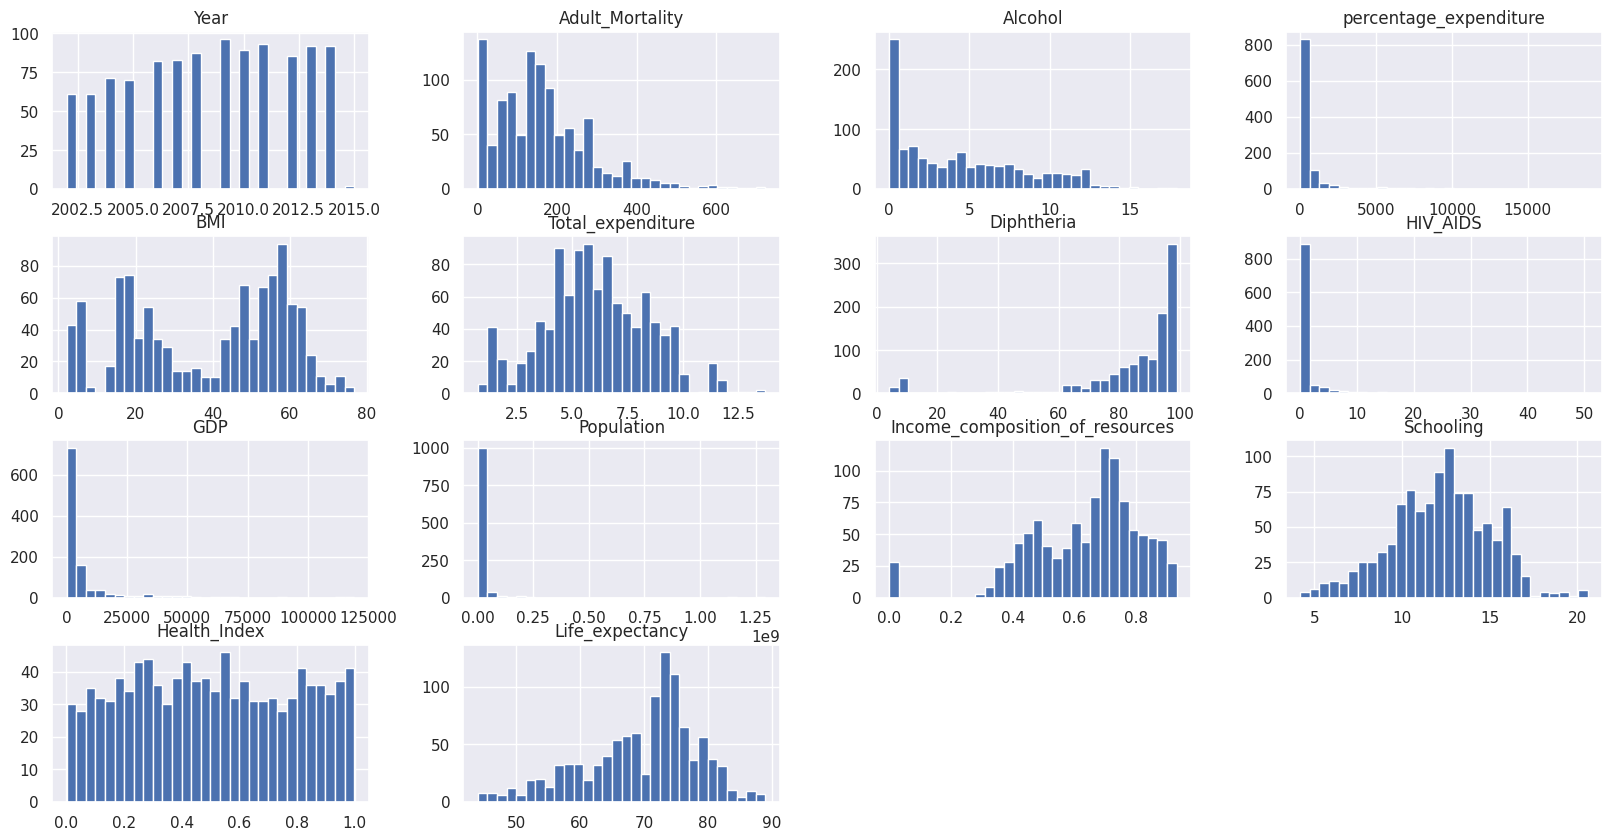

In [109]:
### WRITE CODE TO OBTAIN AND DISPLAY HISTOGRAMS ###
df_train[df_train.columns[~df_train.columns.isin(['Status'])]].hist(bins = 30, figsize = (20, 10))

##### Q1. What can you infer from the histograms? <br/>
Ans-<br/>
**YEAR**: Uniform distribution with a slight upward trend, but very few countries have reported data for 2015.<br/>

**ADULT MORTALITY**: Right skewed distribution with a large amounts of data points close to 0, indicating many countries have very few people that died between 15 and 60 years of age, which may warrant further investigation. <br/>

**ALCOHOL**: Right skewed distribution, with a large amounts of data points at 0 alcohol consumption, indicating some countries are very strict on alcohol consumption. <br/>

**PERCENTAGE EXPENDITURE**: Right skewed distribution, with data points mainly centered at 1000 but some outliers over 5000 to 15000 (see below diagram).<br/>

**BMI**: bimodel distribution with two peaks at 20 and 60 as well as a gap at 10<br/>

**TOTAL EXPENDITURE**: Normal distribution, with a mean around 6%.<br/>

**DIPHITHERIA**: left skewed distribution, with a large amounts of data points at 95% and some outliers around 10% (may be countries who do not support vaccines).<br/>

**HIV/AIDS**: right skewed distribution with a large amounts of data points at 0 death per 1000 live birth and some outliers around 20-50 death per 1000 live birth. <br/>

**GDP**: right skewed distribution with some outliers around USD40,000 to USD60,000 per capita. <br/>

**POPULATION**: right skewed distribution with a large amounts of data points below 200 millions with some outliers between 1 to 1.25 billion (e.g. China, India) (see below diagram). <br/>

**INCOME COMPOSITION OF RESOURCES**: left skewed unimodal with some outliers at 0.<br/>

**SCHOOL**: Nearly a normal distribution with a mean around 12 years (high school education K-12). <br/>

**HEALTH INDEX**: uniform distribution.<br/>

**LIFE EXPECTENCY**: left skewed distribution with majority of data points at 75 years age.

(array([88., 36., 10., 11., 11., 10.,  7.,  4.,  6.,  2.]),
 array([  800.,  1720.,  2640.,  3560.,  4480.,  5400.,  6320.,  7240.,
         8160.,  9080., 10000.]),
 <BarContainer object of 10 artists>)

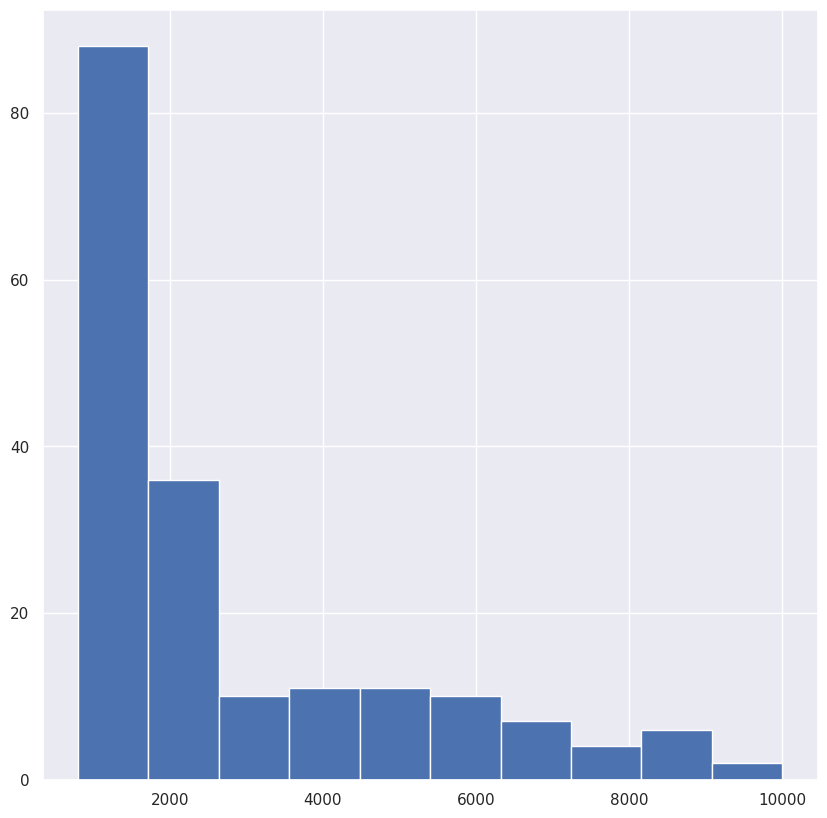

In [110]:
plt.hist(df_train['percentage_expenditure'], range=[800, 10000])

(array([1.044e+03, 1.800e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([3.40000000e+01, 1.29385960e+08, 2.58771886e+08, 3.88157812e+08,
        5.17543738e+08, 6.46929664e+08, 7.76315590e+08, 9.05701516e+08,
        1.03508744e+09, 1.16447337e+09, 1.29385929e+09]),
 <BarContainer object of 10 artists>)

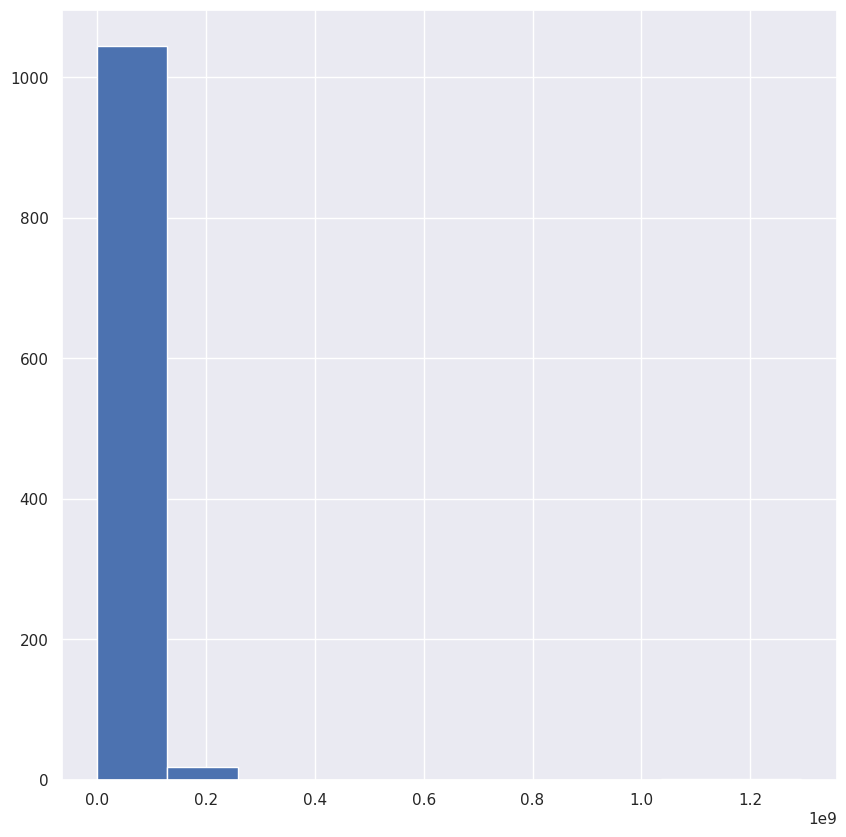

In [112]:
plt.hist(df_train['Population'])

Compute the correlation matrix to get an understanding of the correlation between life_expectancy and the other features.<br/>

In [113]:
### WRITE CODE TO OBTAIN CORRELATION MATRIX ###
df_train.corr()

<ipython-input-113-42299c25ffa5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train.corr()


,Year,Adult_Mortality,Alcohol,percentage_expenditure,BMI,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Income_composition_of_resources,Schooling,Health_Index,Life_expectancy
Year,1.000000,-0.038313,-0.086571,0.067109,0.051691,0.065092,0.047652,-0.132482,0.097973,0.035566,0.130436,0.114918,-0.016607,0.070097
Adult_Mortality,-0.038313,1.000000,-0.219509,-0.245144,-0.379248,-0.140426,-0.224493,0.501118,-0.266366,-0.014055,-0.488337,-0.463605,-0.037935,-0.698473
Alcohol,-0.086571,-0.219509,1.000000,0.420887,0.354946,0.237057,0.248199,-0.060254,0.444423,-0.018267,0.571995,0.605136,0.033899,0.439279
percentage_expenditure,0.067109,-0.245144,0.420887,1.000000,0.227755,0.191810,0.149074,-0.104598,0.956792,-0.014828,0.407670,0.415462,-0.008822,0.412576
BMI,0.051691,-0.379248,0.354946,0.227755,1.000000,0.182665,0.197733,-0.231807,0.246639,-0.061193,0.545933,0.561119,0.008316,0.557677
Total_expenditure,0.065092,-0.140426,0.237057,0.191810,0.182665,1.000000,0.161840,0.012584,0.190730,-0.071048,0.201951,0.254128,0.021584,0.211976
Diphtheria,0.047652,-0.224493,0.248199,0.149074,0.197733,0.161840,1.000000,-0.170364,0.171035,-0.019880,0.320582,0.362596,-0.009137,0.366748
HIV_AIDS,-0.132482,0.501118,-0.060254,-0.104598,-0.231807,0.012584,-0.170364,1.000000,-0.120317,-0.030525,-0.284304,-0.246180,-0.016758,-0.588284
GDP,0.097973,-0.266366,0.444423,0.956792,0.246639,0.190730,0.171035,-0.120317,1.000000,-0.016040,0.454385,0.461627,-0.013335,0.445212
Population,0.035566,-0.014055,-0.018267,-0.014828,-0.061193,-0.071048,-0.019880,-0.030525,-0.016040,1.000000,0.003342,-0.020537,-0.005315,-0.009788


<ipython-input-114-fc716b7313c1>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(), annot=True, fmt = ".1f", annot_kws = {"size":10})


<Axes: >

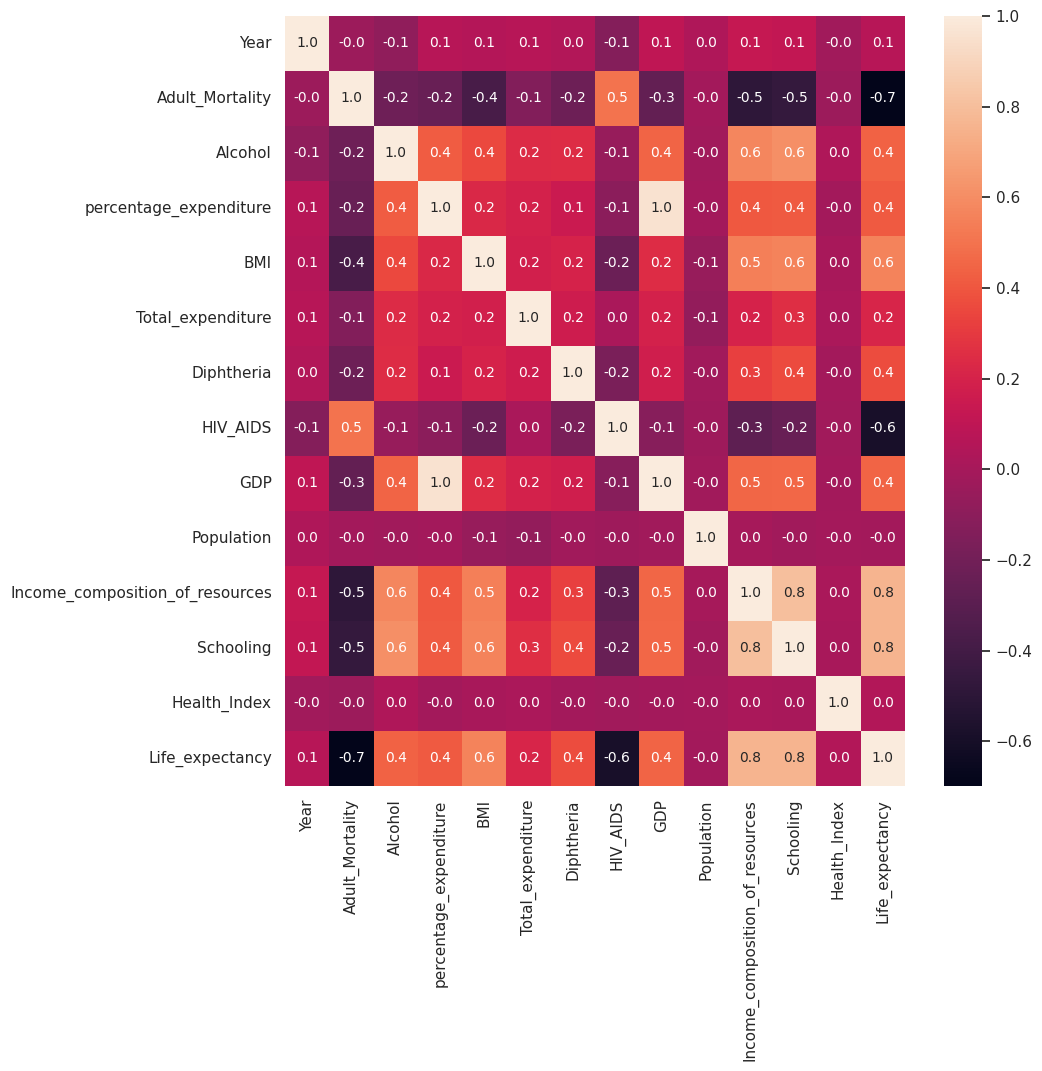

In [114]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(df_train.corr(), annot=True, fmt = ".1f", annot_kws = {"size":10})

##### Answer the following questions:<br/>

##### Q2. Why is the diagonal made up of 1's in the correlation matrix?<br/>
Ans- Every variable is perfectly correlated to itself e.g. Year vs. Year, Alcohol vs. Alcohol, etc.

##### Q3. Why is the matrix symmetric along diagonal?<br/>
Ans- The correlation of A & B is the same as correlation of B & A since it is the same variables transposed on opposite axes.

##### Q4. Looking at the correlation matrix, if you have to choose one predictor for a simple linear regression model with Life_expectancy as the outcome, which one would you choose and why? <br/>
Ans- We would choose the variable with the highest correlation to Life_expectancy.  The two best choices are "Schooling" and "Income composition of resources" which both have a correlation of 0.75 approximately.  We chose "Income composition of resources" because it has a slightly higher correlation  of 0.756 vs 0.755.

##### Q4.1. Is there any variable that does not make sense to you and why? <br/>
Ans- In terms of correlation relative to "Life_expectancy", the following two variables warrant further investigation: <br/>
**Alcohol:** there is a positive correlation suggesting that Life_expectancy increases as Alcohol consumption per captia increase. This is counterintuitive to common understanding that increase in alcohol consumption leads to health issues.  Possible explanations for this positive correlation may be supported by studies that suggest daily red wine consumption increases heart health, and/or routine alcohol consumption maybe lead to more responsible drinking throughout the entire population vs. extreme alcohol consumption in a few select individuals (therefore lowering the overall per capita consumption).
<br/> <br/>
**Health Index:** There is a very weak 0.05 correlation here.  It is assumed that Health Index is a measure of overall country health and a much stronger correlation was expected relative to Life_expectancy.

### Standardization of features

Feature standardization makes the values of each feature in the data have zero-mean and unit-variance. This method is widely used for normalization in many machine learning algorithms. The general method of calculation is to determine the distribution mean and standard deviation for each feature. Next we subtract the mean from each feature. Then we divide the values of each feature by its standard deviation.

$x'$ = ($x$ - $\bar{x}$)/$\sigma$

where $x$ is the original feature vector,
$\bar{x}$ is the mean of the feature vector and
$\sigma$ is its standard deviation.

This is also called Z-score Normalization.

Perform Z-score Normalization on the features (except "Year" and "Status") in both training and test set.

In [115]:
from google.colab import files
uploaded = files.upload()

Saving LifeExpectancy_test_modified.csv to LifeExpectancy_test_modified (2).csv


In [117]:
# Load the test set "LifeExpectancy_test_modified.csv"
### WRITE CODE ###
df_test = pd.read_csv(io.BytesIO(uploaded['LifeExpectancy_test_modified (2).csv']))
df_test.head()

,Year,Status,Adult_Mortality,Alcohol,percentage_expenditure,BMI,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Income_composition_of_resources,Health_Index,Schooling
0,2011,Developing,275,0.01,7.097109,17.2,7.87,68,0.1,63.537231,2978599.0,0.454,0.960279,9.5
1,2008,Developing,287,0.03,25.873925,15.7,8.33,64,0.1,373.361116,2729431.0,0.433,0.655069,8.7
2,2011,Developing,88,5.37,437.062100,55.1,5.71,99,0.1,4437.178680,295195.0,0.738,0.746627,13.3
3,2005,Developing,15,5.16,26.993121,49.9,6.12,98,0.1,279.142931,311487.0,0.685,0.527981,10.8
4,2003,Developing,18,4.29,14.719289,47.9,6.27,97,0.1,189.681557,339616.0,0.674,0.336332,10.7


In [118]:
from sklearn.preprocessing import StandardScaler
### WRITE CODE TO PERFORM Z-score Normalization ###

df_train_X = df_train[df_train.columns[~df_train.columns.isin(['Life_expectancy'])]]
df_train_Y = df_train['Life_expectancy']

exclude_cols = ['Year', 'Status']
df_train_X_num = df_train_X[df_train_X.columns[~df_train_X.columns.isin(exclude_cols)]]
df_test_num = df_test[df_test.columns[~df_test.columns.isin(exclude_cols)]]

scaler = StandardScaler()
df_train_X_normalized = pd.DataFrame(scaler.fit_transform(df_train_X_num), columns = df_train_X_num.columns)
df_test_normalized = pd.DataFrame(scaler.fit_transform(df_test_num), columns = df_test_num.columns)

df_train_X_normalized.head()

,Adult_Mortality,Alcohol,percentage_expenditure,BMI,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Income_composition_of_resources,Schooling,Health_Index
0,-0.595190,-0.726456,0.048715,1.255572,0.445559,-0.171244,-0.313881,0.227204,-0.139413,0.671470,0.356420,-0.096784
1,-0.109184,0.481078,0.023969,-0.320769,-0.831846,0.692054,-0.313881,-0.000131,0.925595,0.556023,0.499431,-1.055036
2,-0.801125,1.830823,-0.351900,0.886429,2.157283,0.500210,-0.313881,-0.438595,-0.074490,1.380648,1.250240,1.442743
3,-0.249220,-1.115662,-0.399797,1.051047,-0.214434,0.452249,-0.313881,-0.482745,-0.182618,0.885873,0.892712,-0.801501
4,0.220312,0.361323,-0.385773,-1.827272,-1.010683,0.548171,-0.201351,-0.459608,-0.107964,0.116223,-0.251379,-0.360090


In [119]:
df_test_normalized.head()

,Adult_Mortality,Alcohol,percentage_expenditure,BMI,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Income_composition_of_resources,Health_Index,Schooling
0,0.764753,-1.088707,-0.387125,-0.949179,0.951465,-0.663302,-0.344694,-0.490177,-0.175739,-0.976549,1.579474,-0.859554
1,0.856804,-1.083814,-0.375553,-1.026485,1.156188,-0.838525,-0.344694,-0.459800,-0.178318,-1.095864,0.530838,-1.141203
2,-0.669720,0.222512,-0.122149,1.004070,-0.009844,0.694674,-0.344694,-0.061370,-0.203512,0.637039,0.845413,0.478281
3,-1.229701,0.171140,-0.374864,0.736078,0.172627,0.650868,-0.344694,-0.469038,-0.203343,0.335912,0.094190,-0.401873
4,-1.206688,-0.041689,-0.382428,0.633004,0.239385,0.607063,-0.344694,-0.477809,-0.203052,0.273414,-0.564275,-0.437079


##### Q5. What are the advantages and disadvantages of using Z-score Normalization?<br/>
Ans- Z-score Normalization allows us to campare different variables on a similar scale, making it easier to understand the significance of each variable on the target or response variable. However, not all data is suitable for Z-score Normalization. If the data is highly skewed, the transformation may make the data strangely distorted and in some cases where the dataset highly deviates from a normal distribution, other forms of standardization may be more suitable.

##### Q6. In this dataset, do you need to use the Z-score Normalization? Explain.<br/>
Ans- Yes, Z-score normalization is required in this dataset due to following three reasons:<br/>
1 - First of all, all features are on different scales, for example: Income_composition_of_resources is between 0 & 1 v.s. population are in millions, due to which more importance can be given to features on a higher scale.<br/>
2 - The model might take longer to converge, or it might be challenging to find an optimal solution due to the variance in the scales as the algorithm would disproportionaly converge in different directions while trying to minimize the errors.<br/> 3 - When features are standardized, interpreting the effect of the individual predictor variables on the target variable becomes easier and more intuitive.<br/>

### One-Hot Encoding

"Year" and "Status" can only take discrete values. We need to perform one-hot encoding on discrete values for it to be processed in the model. One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.
Perform one-hot encoding on "Year" and "Status" and print the shape of your encoded array

In [120]:
from sklearn.preprocessing import OneHotEncoder
### WRITE CODE TO PERFORM ONE-HOT CODING ON "Year" AND "Status" ###
encoder1 = OneHotEncoder(sparse_output=False)
encoder2 = OneHotEncoder(sparse_output=False)

encoded_data_train = encoder1.fit_transform(df_train_X[['Year', 'Status']])
encoded_data_test = encoder2.fit_transform(df_test[['Year', 'Status']])

df_train_X_encoded = pd.DataFrame(encoded_data_train, columns=encoder1.get_feature_names_out(['Year', 'Status']))
df_test_encoded = pd.DataFrame(encoded_data_test, columns=encoder2.get_feature_names_out(['Year', 'Status']))

# Print the shape of your encoded X
print(df_train_X_encoded.shape)
df_train_X_encoded.head()

(1064, 16)


,Year_2002,Year_2003,Year_2004,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Status_Developed,Status_Developing
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [121]:
# Print the shape of your encoded X (test set)
print(df_test_encoded.shape)
df_test_encoded.head()

(458, 15)


,Year_2002,Year_2003,Year_2004,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Status_Developed,Status_Developing
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0



The training set has one extra column after one-hot encoding compared to the test set. This is because the Year column in the training set includes data from the year 2015 as well whereas no data corresponding to 2015 is present in the test set. To keep the features consistent, we will remove the 'Year_2015' column from the training set as well.

In [122]:
df_train_X_encoded = df_train_X_encoded.drop(['Year_2015'], axis = 1)
df_train_X_encoded.head()

,Year_2002,Year_2003,Year_2004,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Status_Developed,Status_Developing
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Q7. What are the other types of encodings and why did we use One-hot encoding for "Year" and "Status"?

Ans- There is another type of encoding called label encoding, which is used for ordinal categorical data where the categories have a natural order (e.g.: education level: high school, undergraduate, graduate, phd.). For "Year" and "Status", there's no intrinsic order in these categories, so we would rather use one-hot encoding as there is no specific hierarchy or prioritization amongst the possible values within these variables.

## Multiple Linear Regression

In the big data era, it is highly unlikely that we are interested in the effect of a single variable on another. To simultaneously account for the effects of multiple variables, we use multiple regression (which accounts for the covariances between predictors).

While the algorithmic solution to multiple regression exists, it is easier to conceptualize in terms of linear algebra. The optimal $\hat{\beta}$ vector that minimizes the residual sum of squares is:

$\hat{\beta} = (X^TX)^{-1}X^Ty $


Perform multiple linear regression on the training dataset, where the outcome is "Life_expectancy".

In [123]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [124]:
# Resetting index to align the dataframes before combining
df_train_X_encoded.reset_index(drop=True, inplace=True)
df_test_encoded.reset_index(drop=True, inplace=True)
df_train_X_normalized.reset_index(drop=True, inplace=True)
df_test_normalized.reset_index(drop=True, inplace=True)

# Combining encoded categorical data and scaled numerical data
combined_df_train_X = pd.concat([df_train_X_normalized, df_train_X_encoded], axis=1)
combined_df_test = pd.concat([df_test_normalized, df_test_encoded], axis=1)

# Display the first few rows of the combined dataframe
combined_df_train_X.head()

,Adult_Mortality,Alcohol,percentage_expenditure,BMI,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Income_composition_of_resources,...,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Status_Developed,Status_Developing
0,-0.595190,-0.726456,0.048715,1.255572,0.445559,-0.171244,-0.313881,0.227204,-0.139413,0.671470,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,-0.109184,0.481078,0.023969,-0.320769,-0.831846,0.692054,-0.313881,-0.000131,0.925595,0.556023,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,-0.801125,1.830823,-0.351900,0.886429,2.157283,0.500210,-0.313881,-0.438595,-0.074490,1.380648,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-0.249220,-1.115662,-0.399797,1.051047,-0.214434,0.452249,-0.313881,-0.482745,-0.182618,0.885873,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.220312,0.361323,-0.385773,-1.827272,-1.010683,0.548171,-0.201351,-0.459608,-0.107964,0.116223,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [125]:
combined_df_test.head()

,Adult_Mortality,Alcohol,percentage_expenditure,BMI,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Income_composition_of_resources,...,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Status_Developed,Status_Developing
0,0.764753,-1.088707,-0.387125,-0.949179,0.951465,-0.663302,-0.344694,-0.490177,-0.175739,-0.976549,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.856804,-1.083814,-0.375553,-1.026485,1.156188,-0.838525,-0.344694,-0.459800,-0.178318,-1.095864,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.669720,0.222512,-0.122149,1.004070,-0.009844,0.694674,-0.344694,-0.061370,-0.203512,0.637039,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,-1.229701,0.171140,-0.374864,0.736078,0.172627,0.650868,-0.344694,-0.469038,-0.203343,0.335912,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-1.206688,-0.041689,-0.382428,0.633004,0.239385,0.607063,-0.344694,-0.477809,-0.203052,0.273414,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [126]:
### Bulding and fitting the Multiple Linear Regression model###
model = LinearRegression()
model.fit(combined_df_train_X, df_train_Y)

LinearRegression()

In [127]:
### Evaluate the Linear Regression model by computing MSE on the training set###
from sklearn.metrics import mean_squared_error
y_pred = model.predict(combined_df_train_X)
mse = mean_squared_error(df_train_Y, y_pred)
mse

12.747314971108775

Q8. Print the value of coefficients and also the corresponding variable names for the coefficients.

In [128]:
print(f'{"Variable":32} {"Coefficient":>15}')
for var, coef in zip(combined_df_train_X.columns,model.coef_):
  print(f'{var:32} {round(coef, 2):>15}')

Variable                             Coefficient
Adult_Mortality                            -2.02
Alcohol                                    -0.49
percentage_expenditure                      0.62
BMI                                         0.71
Total_expenditure                           0.26
Diphtheria                                   0.5
HIV_AIDS                                   -2.68
GDP                                         0.16
Population                                 -0.05
Income_composition_of_resources             2.17
Schooling                                   2.62
Health_Index                                0.25
Year_2002                                  -0.62
Year_2003                                  -0.28
Year_2004                                  -0.61
Year_2005                                  -0.59
Year_2006                                  -0.89
Year_2007                                  -0.95
Year_2008                                  -1.27
Year_2009           

Using the coefficients of all the features, we can assess the relative importnce of each feature while making a prediction. Below, we create a dataframe containing the features and the absolute value of their features. This dataframe will be used in feature selection later in this notebook (refer to method 1 of feature selection later).

In [129]:
coeff_weight = pd.DataFrame(combined_df_train_X.columns,abs(model.coef_), columns = ['features']).sort_index(ascending = False)
coeff_weight

,features
2.684256,HIV_AIDS
2.619574,Schooling
2.172872,Income_composition_of_resources
2.029620,Year_2014
2.023033,Year_2013
2.020835,Adult_Mortality
1.953881,Year_2011
1.889112,Year_2012
1.730617,Year_2010
1.577695,Year_2009


Below, we have created another correlation matrix heatmap after including the one-hot encoded columns for Year and Status, to assess and quantify their correlation with other variables.

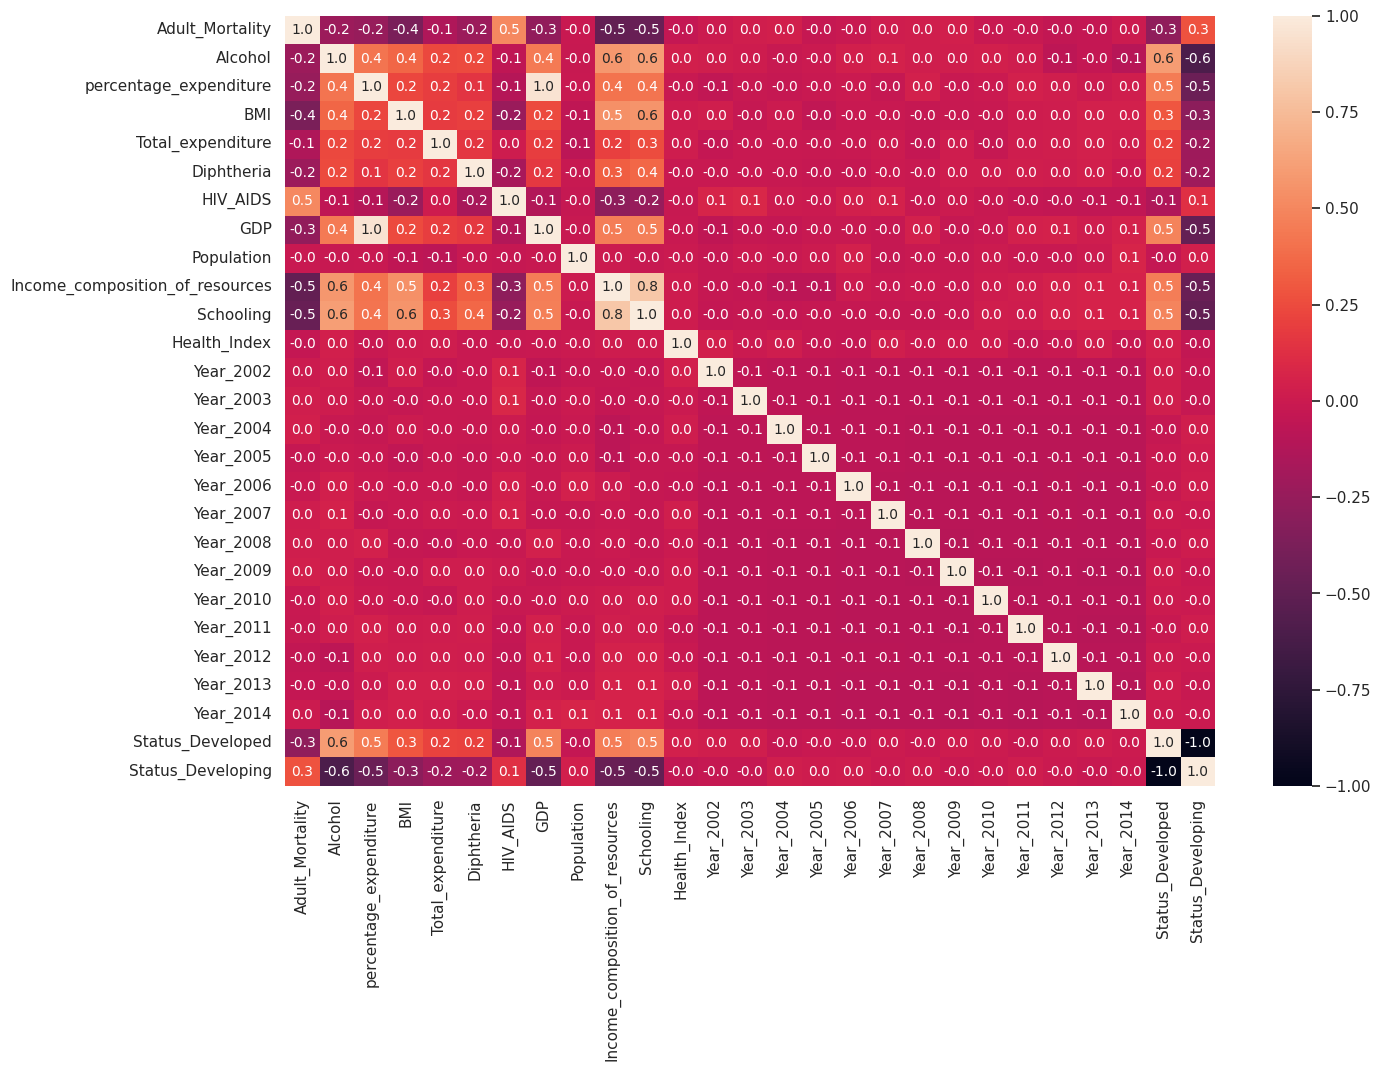

In [130]:
correlation_matrix = combined_df_train_X.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", annot_kws={"size": 10})

plt.show()

Q9. Is there a problem of multicolinearity? Explain what you can do

Ans- There can be a problem of multicollinearity in this model due to which some of these coefficients may not be very accurate and can be highly sensitive to changes in the data. It can also add unnecessary features The multicollinearity can be caused by high correlation between the following:<br/>
1 - GDP & percentage expenditure (0.96)<br/>
2 - Income composition of resources & Schooling (0.81)<br/>
3 - Status Developed & Status Developing (-1.0)<br/>

To deal with multicollinearity, we can run a model by excluding one set of highly correlated features (for example dropping percentage expenditure & just using GDP) and assess the mse & adjusted r2_score of the updated model. If the mse does not increase a lot or if the adjusted r2_score inceases or remains the same, we can go ahead with the restricted set of features. Otherwise, the features we excluded are likely to be actually significant to the model and it may not be the right decision to exclude them.

### Goodness of fit

A model can always make predictions. But it is important to determine how good the model is.
How do we know that our model captures the data well? When evaluating model fit, a good metric is $R^2$, which corresponds to the amount of variance explained by the model. The formula for $R^2$ is the following:

$R^2$ = $1 - \dfrac{RSS}{TSS}$<br/>
where:<br/>
$RSS = \Sigma(y - \hat{y})^2$<br/>
$TSS = \Sigma(y - \bar{y})^2$<br/>

$R^2$ is also one metric for comparing models against each other. It is intuitive to say that the model that explains more variation in the data is a better fit than one that explains less variation.

Fill in the code for calculation of R2 score

In [131]:
from sklearn.metrics import r2_score

$R^2$ for model with "Schooling" as predictor and "Life_expectancy" as outcome

In [132]:
### WRITE CODE ###

X_1 = combined_df_train_X[['Schooling']]
y = df_train_Y

model = LinearRegression()
model.fit(X_1, y)
y_pred_1 = model.predict(X_1)

# Print R2 score
r2 = r2_score(y, y_pred_1)
r2

0.5702238510104203

$R^2$ for model with "Schooling", "Adult_Mortality" as predictor and "Life_expectancy" as outcome

In [133]:
### WRITE CODE ###
X_2 = combined_df_train_X[['Schooling', 'Adult_Mortality']]
y = df_train_Y

model = LinearRegression()
model.fit(X_2, y)
y_pred_2 = model.predict(X_2)

# Print R2 score
r2 = r2_score(y, y_pred_2)
r2

0.7248288890984036

$R^2$ for model with "Schooling","Adult_Mortality" and "Population" as predictor and "Life_expectancy" as outcome

In [134]:
### WRITE CODE ###
X_3 = combined_df_train_X[['Schooling', 'Adult_Mortality', 'Population']]
y = df_train_Y

model = LinearRegression()
model.fit(X_3, y)
y_pred_3 = model.predict(X_3)

# Print R2 score
r2 = r2_score(y, y_pred_3)
r2

0.7248514023230492

You can see $R^2$ is always going up as we keep adding features.

This is one drawback of only using $R^2$ to evaluate your model. Adding predictors seems to always improve the predictive ability of your model, though it may not be true.

That is to say, we are not necessarily interested in making a perfect prediciton of our training data. If we were, we would always use all of the predictors available. Rather, we would like to make a perfect prediction of our test data. In this case, adding all the predictors may not be a good idea due to the trade-off between bias and variance. Thus, we are interested in the most predictive features, in the hopes that we can create a simpler model that performs well in the future.

This is why we consider another metric, Adjusted R2.
The adjusted R-squared increases only if the new term improves the model more than would be expected by chance.


$AdjustedR^2$ = $1 - \dfrac{(1-R^2)(n-1)}{(n-p-1)}$<br/>
where:<br/>
n = number of samples<br/>
p = number of features

Fill in the code for calculation of adjusted R2 score

Adjusted $R^2$ for model with "Schooling" as predictor and "Life_expectancy" as outcome

In [135]:
### WRITE CODE ###
X_1 = combined_df_train_X[['Schooling']]
y = df_train_Y

model = LinearRegression()
model.fit(X_1, y)
y_pred_1 = model.predict(X_1)

r2 = r2_score(y, y_pred_1)
r2

n = len(y)
p = X_1.shape[1]
adjusted_r_squared = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Print Adjusted R2 score
print(f"Adjusted R-squared:{adjusted_r_squared}")

Adjusted R-squared:0.5698191653710705


Adjusted $R^2$ for model with "Schooling", "Adult_Mortality" as predictor and "Life_expectancy" as outcome.

In [136]:
### WRITE CODE ###
X_2 = combined_df_train_X[['Schooling', 'Adult_Mortality']]
y = df_train_Y

model = LinearRegression()
model.fit(X_2, y)
y_pred_2 = model.predict(X_2)

# Print R2 score
r2 = r2_score(y, y_pred_2)
r2

n = len(y)
p = X_2.shape[1]
adjusted_r_squared = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Print Adjusted R2 score
print(f"Adjusted R-squared:{adjusted_r_squared}")

Adjusted R-squared:0.7243101876640934


Adjusted $R^2$ for model with "Schooling","Adult_Mortality" and "Population" as predictor and "Life_expectancy" as outcome

In [137]:
### WRITE CODE ###
X_3 = combined_df_train_X[['Schooling', 'Adult_Mortality', 'Population']]
y = df_train_Y

model = LinearRegression()
model.fit(X_3, y)
y_pred_3 = model.predict(X_3)

# Print R2 score
r2 = r2_score(y, y_pred_3)
r2

n = len(y)
p = X_3.shape[1]
adjusted_r_squared = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Print Adjusted R2 score
print(f"Adjusted R-squared:{adjusted_r_squared}")

Adjusted R-squared:0.7240726798767938


### K-fold Cross-Validation

However, adjusted $R^2$ is not enough to help us ahieve the best model, a more robust method is k-fold cross-validation.

* Randomly split dataset into K equal-sized subsets, or folds
* Treat each fold as validation set (train on all but K'th fold and test on K'th fold only)

* The overall error is then the mean error over all K models.
* Most common are 5- or 10-fold cross-validation

Please implement a 5-fold cross-validation by yourselves to find the best model in terms of Mean Square Error(MSE)

**Do not use sklearn.model_selection.cross_val_score or other built-in cross-validaiton functions**

In [138]:
# Design a function to implement 5-fold cross-validation.
# The input: training features X, training target y and # of folds f=5.
# The output: the average of MSE over the 5 folds.

def cross_val_mse(X, y, f):
    ### Write your code here ###
    mse_score = []

    # shuffle the data
    indices = np.arange(len(X))
    np.random.shuffle(indices)

    # fold size
    fold_size = len(X) // f

    #
    for i in range(f):
        # Split data into training and validation sets
        start, end = i * fold_size, min((i + 1) * fold_size, len(X))
        X_test, y_test = X.iloc[indices[start:end]], y.iloc[indices[start:end]]
        train_indices = np.concatenate([indices[:start], indices[end:]])
        X_train, y_train = X.iloc[train_indices], y.iloc[train_indices]

        # Train the model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Predict and calculate MSE
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mse_score.append(mse)

    # Return average MSE
    return np.mean(mse_score)

## Feature Selection

To select the best set of features, we initially tried the brute force method. However, as the # of features was very high (after one-hot encoding), the run-time was extremely high and it was not feasible to use this method. To counter this, we used the following three approaches:- </br>

1 - Using coefficients of features </br>
2 - Finding combinations first and using the one-hot encoded features only in limited cases </br>
3 - using RFE </br>

### Method 1 - Using coefficients of features </br>

In this method, we leveraged the coefficients for all the features that we got after running the initial linear regression model in step (in Q8). We sorted the coefficients in decreasing order of absolute value of coefficients, as it is more likely that variables with higher magnitude of coefficients will have more effect on the target variable. We looped through the sorted list of features, and added a feature if adding it to the model reduced the mse. The set of features that gave the lowest mse was picked.

In [139]:
# By using your above functions, find the best combination of features, which has the lowest averaged MSE
from itertools import combinations
### Write code here ###
def best_combination_feature_1(X, y, f, feature_list):

    best_mse = float('inf')  # Initialize best_mse to a very large number
    best_combination = None

    features = []

    for i in range(len(feature_list)):
          features.append(feature_list[i])
          selected_features = X[features]

              # Use the cross_val_mse function to compute the average MSE for the current combination of features
          average_mse = cross_val_mse(selected_features, y, f)

          if average_mse < best_mse:
              best_mse = average_mse
              best_combination = features

          else:
              features.remove(feature_list[i])

    return best_combination, best_mse

In [140]:
 # Print the best features and the corresponding mse
### WRITE CODE ###
best_features, lowest_mse = best_combination_feature_1(combined_df_train_X, y, 5, coeff_weight['features'].tolist())
best_features, lowest_mse

(['HIV_AIDS',
  'Schooling',
  'Income_composition_of_resources',
  'Adult_Mortality',
  'Year_2011',
  'Year_2012',
  'Year_2006',
  'percentage_expenditure',
  'Year_2004',
  'Diphtheria',
  'Status_Developing'],
 13.81161490577036)

## Method 2 - Finding combinations first and using the one-hot encoded features only in limited cases

In this method, we went through all possible combinations of the original features (before performing one-hot encoding on 'Year' and 'Status'). If a combination contained 'Year' or 'Status', we included all the columns after one-hot encoding was performed for that particular variable. Essentially, it is equivalent to using brute force method prior to one-hot encoding and using the one-hot encoded columns only when that original variable is a part of that combination. On using this method, we can either pick all columns corresponding to 'Year' (or 'Status') or none of them, but never a subset of the columns. The set of features that gave the lowest mse was picked.

In [141]:
# By using your above functions, find the best combination of features, which has the lowest averaged MSE
from itertools import combinations
### Write code here ###
def best_combination_feature_2(X, y, f, orig_col_list):
    best_mse = float('inf')
    best_combo = None

    # Iterate over all non-empty combinations of features
    for i in range(1, len(orig_col_list) + 1):
            for combo in combinations(orig_col_list, i):
                if 'Year' in combo and 'Status' in combo:
                  selected_features = X[[item for item in combo if item not in ['Year', 'Status']] + \
                   ['Year_2002', 'Year_2003', 'Year_2004', 'Year_2005', 'Year_2006','Year_2007', 'Year_2008', 'Year_2009',
                     'Year_2010', 'Year_2011','Year_2012', 'Year_2013', 'Year_2014', 'Status_Developed','Status_Developing']]

                elif 'Year' in combo:
                  selected_features = X[[item for item in combo if item not in ['Year']] + \
                   ['Year_2002', 'Year_2003', 'Year_2004', 'Year_2005', 'Year_2006','Year_2007', 'Year_2008', 'Year_2009',
                     'Year_2010', 'Year_2011','Year_2012', 'Year_2013', 'Year_2014']]

                elif 'Status' in combo:
                  selected_features = X[[item for item in combo if item not in ['Status']] + ['Status_Developed',
                                                                                              'Status_Developing']]

                else:
                  selected_features = X[list(combo)]

                # Use the cross_val_mse function to compute the average MSE for the current combination of features
                average_mse = cross_val_mse(selected_features, y, f)

                if average_mse < best_mse:
                    best_mse = average_mse
                    best_combination = combo

    return best_combination, best_mse

In [142]:
best_features, lowest_mse = best_combination_feature_2(combined_df_train_X, y, 5, list(df_train_X.columns))
best_features, lowest_mse

(('Year',
  'Status',
  'Adult_Mortality',
  'Alcohol',
  'BMI',
  'Diphtheria',
  'HIV_AIDS',
  'GDP',
  'Population',
  'Income_composition_of_resources',
  'Schooling',
  'Health_Index'),
 13.31646105336884)

### Method 3 - Using RFE

In this method, we leveraged the RFE function from sklearn.feature_selection to pick the optimal set of features.

In [170]:
# By using your above functions, find the best combination of features, which has the lowest averaged MSE
from itertools import combinations
from sklearn.feature_selection import RFE
### Write code here ###
def best_combination_feature_3(X, y, f):
    best_mse = float('inf')
    best_combo = None

    # Iterate over all non-empty combinations of features
    # Perform RFE with cross-validation
    for i in range(1, len(X.columns) + 1):

      rfe = RFE(estimator=LinearRegression(), n_features_to_select=i)
      rfe.fit(X, y)

      X_rfe = pd.DataFrame(rfe.transform(X))
      mse = cross_val_mse(X_rfe, y, f)

      if mse < best_mse:
          best_mse = mse
          best_combo = X.columns[rfe.support_]

    return best_combo, best_mse

In [171]:
best_features, lowest_mse = best_combination_feature_3(combined_df_train_X, y, 5)
best_features, lowest_mse

(Index(['Adult_Mortality', 'Alcohol', 'percentage_expenditure', 'BMI',
        'Diphtheria', 'HIV_AIDS', 'Income_composition_of_resources',
        'Schooling', 'Year_2008', 'Year_2009', 'Year_2010', 'Year_2011',
        'Year_2012', 'Year_2013', 'Year_2014', 'Status_Developed'],
       dtype='object'),
 13.25443434157906)

Based on the lowest mse obtained from the 3 methods above, the model built using method 3 (using RFE) gives the best performance on using 5-fold cross validation. Hence, we decided to go ahead with the set of features based on method 3 to build the final model and use it for prediction on the test set. However, the mse obtained from all three methods are relatively close and all of them seem suitable for making predictions of the life expectancy.

### Test your model
Now, apply your best model to predict the target values from the test feature set "LifeExpectancy_test_modified.csv". We will grade this part based on your prediction error.

Hint: Please be careful on standardization and one-hot encoding (if you use), the test set should be consistent with the training set in terms of any transformation.

Hint2: You may want to modify the previous steps to make the transformation of the test set consistent with the training set.

In [172]:
### WRITE CODE ###
model = LinearRegression()
model.fit(combined_df_train_X[list(best_features)], y)

LinearRegression()

In [173]:
# Output your prediction on test set as y_pred.
y_pred = model.predict(combined_df_test[list(best_features)])

In [174]:
#end